# The Beatles songs EDA
This small EDA is conducted to prepare a small case study for the *Popular Music Datasets* paper.

Starting points: The Beatles songs dataset version *The Beatles songs dataset, 285x45, v0.csv*, resulting from the *spotipy-getting-started* project.

## Import statements

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

from IPython.display import display
pd.options.display.max_columns = None               # enable displaying ALL columns of a DataFrame

## Read The Beatles songs dataset

In [5]:
# Get the songs as a pd.DataFrame object from '../data/The Beatles songs dataset, 285x45, v0.csv'
songs = pd.read_csv('../data/The Beatles songs dataset, 285x45, v0.csv')
display(songs.sample(10))

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,Valence,Danceability,Energy,Loudness,Acousticness,Instrumentalness,Liveness,Speechiness,Album debut,Other releases,Single A side,Single B side,Single certification,Genre,Styles,Themes,Moods,Songwriter(s),Lead vocal(s),Cover,Covered by,Chart position UK (Wikipedia),Chart position US (Wikipedia),Highest position (The Guardian),Weeks on chart in UK (The Guardian),Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
89,spotify:track:6UCFZ9ZOFRxK8oak7MdPZu,Her Majesty,1969,Abbey Road,27.0,23.0,2.0,1.0,100.874,3.0,0.522,0.703,0.215,-23.030,0.72800,0.000001,0.1300,0.0892,Abbey Road,8.0,NaN,NaN,NaN,"Music Hall, Folk, Pop/Rock","Contemporary Pop/Rock, Early Pop/Rock, Singer/...",NaN,Bright Intimate Light Playful Sweet Whimsical ...,McCartney,McCartney,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,spotify:track:6r7JAngkBzKGDKRUzLgY2U,The Ballad of John and Yoko,1969,Past Masters (Vols. 1 & 2 / Remastered),40.0,179.0,4.0,1.0,135.183,4.0,0.938,0.656,0.865,-8.241,0.00561,0.000104,0.0853,0.0311,UK: 1967-1970 US: Hey Jude,14.0,The Ballad of John and Yoko,Old Brown Shoe,RIAA Gold,"Rock and Roll, Pop/Rock",NaN,NaN,Freewheeling Humorous Irreverent Playful Rolli...,Lennon,"Lennon, with McCartney",NaN,4.0,1.0,8.0,1.0,14.0,3.0,8.0,NaN,28.0,49.0,48.0,NaN,NaN,NaN,NaN
278,spotify:track:4LLBKnNCrSRrSjSTuiwjE9,You Won't See Me,1965,Rubber Soul,57.0,202.0,9.0,1.0,115.941,4.0,0.473,0.488,0.539,-8.752,0.13600,0.000000,0.0538,0.0304,Rubber Soul,11.0,NaN,NaN,NaN,Pop/Rock,"British Invasion, Contemporary Pop/Rock, Early...","Breakup, Regret",Bright Rousing Acerbic Bitter Wry Yearning Fre...,McCartney,McCartney,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,spotify:track:6j67aNAPeQ31uw4qw4rpLa,Wild Honey Pie,1968,The Beatles,52.0,52.0,2.0,1.0,89.900,4.0,0.152,0.792,0.763,-11.185,0.42500,0.627000,0.7890,0.0506,The Beatles,7.0,NaN,NaN,NaN,"Experimental pop, Lo-Fi, Psychedelic Folk, Pop...","British Psychedelia, Contemporary Pop/Rock, Ea...",NaN,Freewheeling Humorous Irreverent Playful Quirk...,McCartney,McCartney,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25,spotify:track:0j3p1p06deJ7f9xmJ9yG22,Back in the U.S.S.R.,1968,The Beatles,65.0,163.0,9.0,1.0,142.489,4.0,0.494,0.480,0.969,-7.464,0.06900,0.000220,0.0608,0.0854,The Beatles,13.0,Back in the U.S.S.R.,Twist and Shout,NaN,"Rock and Roll, Hard Rock, Pop/Rock","Contemporary Pop/Rock, Hard Rock, Rock & Roll,...","Playful, At the Beach, Partying, Road Trip, Va...",Exciting Freewheeling Fun Playful Rollicking R...,McCartney,McCartney,NaN,13.0,19.0,NaN,19.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0,NaN,47.0
0,spotify:track:2FDEHIMkjxFLzj688M2I3h,(You're So Square) Baby I Don't Care - Studio Jam,NaN,The Beatles,29.0,43.0,9.0,1.0,112.173,4.0,0.353,0.411,0.840,-9.919,0.09910,0.000000,0.3640,0.0896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,spotify:track:4MLBqAEzNN89o2M9h92Z26,Get Back,1969,Let It Be,70.0,194.0,2.0,1.0,123.095,4.0,0.332,0.761,0.592,-9.836,0.49200,0.006260,0.6100,0.0586,Let It Be,28.0,Get Back,Don't Let Me Down,RIAA 2xPlatinum,"Blues Rock, Pop/Rock","Album Rock, Contemporary Pop/Rock, Early Pop/R...","Argument, Lifecycle, Starting Out",Freewheeling Humorous Irreverent Playful Rolli...,McCartney,McCartney,NaN,21.0,1.0,1.0,1.0,17.0,6.0,1.0,5.0,4.0,29.0,41.0,32.0,14.0,30.0,NaN
90,spotify:track:6dGnYIeXmHdcikdzNNDMm2,Here Comes the Sun,1969,Abbey Road,87.0,186.0,9.0,1.0,129.171,4.0,0.394,0.557,0.540,-10.484,0.03390,0.002480,0.1790,0.0347,Abbey Road,6.0,NaN,NaN,NaN,"Folk Pop, Pop/Rock","Album Rock, Contemporary Pop/Rock, Early Pop/Rock","Day Driving, Spring, Summer, The Great Outdoors",Bright Cheerful Happy Spri

## Show the dataset columns

In [3]:
songs.columns

Index(['URI', 'Title', 'Year', 'Album', 'Popularity', 'Duration', 'Key',
       'Mode', 'Tempo', 'Time_signature', 'Valence', 'Danceability', 'Energy',
       'Loudness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Speechiness', 'Album debut', 'Other releases', 'Single A side',
       'Single B side', 'Single certification', 'Genre', 'Styles', 'Themes',
       'Moods', 'Songwriter(s)', 'Lead vocal(s)', 'Cover', 'Covered by',
       'Chart position UK (Wikipedia)', 'Chart position US (Wikipedia)',
       'Highest position (The Guardian)',
       'Weeks on chart in UK (The Guardian)',
       'Weeks at No1 in UK (The Guardian)', 'Highest position (Billboard)',
       'Weeks at No1 (Billboard)', 'Top 50 (Billboard)',
       'Top 50 (Ultimate classic rock)', 'Top 50 (Rolling Stone)',
       'Top 50 (NME)', 'Top 50 (Top50songs.org)', 'Top 50 (USA today, 2017)',
       'Top 50 (Vulture, by Bill Wyman)'],
      dtype='object')

## Turn charts data to *int* values
Do it for all chart positions, weeks on charts, highest chart position, and weeks at No.1 data. The first step is to replace all `NaN` values with -1. Then convert the values in all these columns to `int`.

In [252]:
# Example for a single column:
# songs['Top 50 (Billboard)'].where((songs['Top 50 (Billboard)']).notnull(), -1, inplace=True).head(20)

# For all relevant columns:
for column in songs.columns[31:]:
    # print(songs[column].where((songs[column]).notnull(), -1).astype(int).head(20))
    songs[column].where((songs[column]).notnull(), -1, inplace=True)
    songs[column] = songs[column].astype(int)
    print(songs[column].head(20))

0     -1
1     -1
2     -1
3     63
4      1
5     -1
6     -1
7     -1
8     -1
9     -1
10    -1
11    -1
12    -1
13    -1
14    -1
15     1
16    -1
17    -1
18    -1
19    -1
Name: Chart position UK (Wikipedia), dtype: int32
0     -1
1     -1
2     -1
3     -1
4      1
5     -1
6     -1
7     -1
8     -1
9     47
10    19
11    -1
12    45
13    -1
14    -1
15     1
16    12
17    -1
18    -1
19    -1
Name: Chart position US (Wikipedia), dtype: int32
0     -1
1     -1
2     -1
3     -1
4      1
5     -1
6     -1
7     -1
8     -1
9     -1
10    29
11    -1
12    -1
13    -1
14    -1
15    -1
16    -1
17    -1
18    -1
19    -1
Name: Highest position (The Guardian), dtype: int32
0     -1
1     -1
2     -1
3     -1
4     13
5     -1
6     -1
7     -1
8     -1
9     -1
10     6
11    -1
12    -1
13    -1
14    -1
15    -1
16    -1
17    -1
18    -1
19    -1
Name: Weeks on chart in UK (The Guardian), dtype: int32
0    -1
1    -1
2    -1
3    -1
4     3
5    -1
6    -1
7    -1
8    -1


In [253]:
# Save the modified dataset
songs.to_csv('../data/The Beatles songs dataset, 285x45, v1.csv', index=False)

## How many Beatles songs have reached Billboard Top 50?
Show a corresponding bar graph.

### Read The Beatles songs dataset

In [6]:
# Get the songs as a pd.DataFrame object from '../data/The Beatles songs dataset, 285x45, v1.csv'
songs = pd.read_csv('../data/The Beatles songs dataset, 285x45, v1.csv')
display(songs.sample(10))

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,Valence,Danceability,Energy,Loudness,Acousticness,Instrumentalness,Liveness,Speechiness,Album debut,Other releases,Single A side,Single B side,Single certification,Genre,Styles,Themes,Moods,Songwriter(s),Lead vocal(s),Cover,Covered by,Chart position UK (Wikipedia),Chart position US (Wikipedia),Highest position (The Guardian),Weeks on chart in UK (The Guardian),Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)"
36,spotify:track:3SdingSsFcZDZAyvcJbgAw,Can't Buy Me Love,1964,A Hard Day's Night,70.0,131.0,0.0,1.0,170.720,4.0,0.842,0.483,0.677,-5.910,0.2830,0.000000,0.3210,0.0593,UK: A Hard Day's Night US: Hey Jude,42.0,Can't Buy Me Love,You Can't Do That,RIAA Gold,Pop/Rock,"British Invasion, Contemporary Pop/Rock, Early...","Awareness, In Love, Passion, Romance",Bright Energetic Fun Joyous Playful Rollicking...,McCartney,"McCartney, with Lennon",NaN,22.0,1,1,1,15,3,1,5,10,21,29,43,15,14,-1
225,spotify:track:4BRkPBUxOYffM2QXVlq7aC,Taxman,1966,Revolver,60.0,159.0,7.0,1.0,133.586,4.0,0.783,0.469,0.596,-8.348,0.0101,0.000000,0.3210,0.0749,Revolver,10.0,NaN,NaN,NaN,"Rock, Hard Rock, Psychedelic Rock, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...",NaN,Acerbic Cynical/Sarcastic Energetic Rousing Sa...,"Harrison, with uncredited contribution from Le...",Harrison,NaN,14.0,-1,-1,-1,-1,-1,-1,-1,-1,35,-1,36,-1,25,-1
220,spotify:track:1e6CxoqLmVADMyDW72cppZ,Step Inside Love / Los Paranoias,1968,Anthology 3,28.0,151.0,7.0,1.0,132.190,1.0,0.749,0.644,0.319,-12.381,0.5620,0.000077,0.2610,0.1540,Anthology 3,NaN,NaN,NaN,NaN,"Folk Rock, Pop/Rock","Contemporary Pop/Rock, Singer/Songwriter, Soft...","Affection/Fondness, Comfort, In Love, New Love...",Cheerful Light Playful Ramshackle Relaxed Soft...,"McCartney (Step Inside Love); Lennon, McCartne...",McCartney,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
105,spotify:track:0lURiNHmeSMdiOtJmHWpOD,I Just Don't Understand,1963,Live at the BBC,27.0,168.0,9.0,1.0,140.368,3.0,0.857,0.586,0.459,-13.600,0.6640,0.000125,0.0693,0.0322,Live at the BBC,NaN,NaN,NaN,NaN,"Rock, Pop/Rock","British Invasion, Merseybeat, Contemporary Pop...","Feeling Blue, Heartache, Regret",Brooding Passionate Somber Anguished/Distraugh...,"Wilkin, Westberry",Lennon,Y,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
280,spotify:track:70HNt0eoBVqr4ss68U8x3B,You're Going to Lose That Girl,1965,Help!,57.0,140.0,4.0,1.0,131.975,4.0,0.818,0.533,0.660,-7.694,0.3460,0.000000,0.2600,0.0337,Help!,6.0,NaN,NaN,NaN,"Rock, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...",NaN,Bravado Bright Swaggering Rollicking Organic,Lennon,Lennon,NaN,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,27,-1,-1,-1,-1
90,spotify:track:6dGnYIeXmHdcikdzNNDMm2,Here Comes the Sun,1969,Abbey Road,87.0,186.0,9.0,1.0,129.171,4.0,0.394,0.557,0.540,-10.484,0.0339,0.002480,0.1790,0.0347,Abbey Road,6.0,NaN,NaN,NaN,"Folk Pop, Pop/Rock","Album Rock, Contemporary Pop/Rock, Early Pop/Rock","Day Driving, Spring, Summer, The Great Outdoors",Bright Cheerful Happy Springlike Summery Sweet...,Harrison,Harrison,NaN,27.0,-1,-1,-1,-1,-1,-1,-1,-1,32,28,4,5,9,16
185,spotify:track:76ncj5k8RGPo49wEyDzrb6,Ooh! My Soul,1963,Live at the BBC,24.0,98.0,4.0,1.0,96.721,4.0,0.653,0.576,0.890,-10.231,0.5710,0.000032,0.8480,0.0484,Live at the BBC,NaN,NaN,NaN,NaN,Pop/Rock,"British Invasion, Merseybeat, Contemporary Pop...","Cool & Cocky, Guys Night Out, Partying, Sex",Gritty Passionate Gutsy Raucous Rollicking Rou...,Penniman,McCartney,Y,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
126,spotify:track:6MVohEoExQiPfsoTeWh5NA,I'm Talking About You,1963,On Air - Live At The BBC (Vol.2),27.0,112.0,4.0,1.0,143.730,4.0,0.948,0.579,0.772,-9.387,0.8260,0.742000,0.5480,0.0419,On Air – Live at the BBC Volume 2,NaN,NaN,NaN,NaN,Po

### Add another column, *Top50*
A song has reached Billboard Top 50 chart (`Yes`), or it hasn't (`No`).

In [7]:
songs['Top50'] = 'No'

Create the index of the songs that HAVE reached Billboard Top 50: `i = songs.loc[songs['Top.50.Billboard'] != -1].index` or `i = np.array(songs.loc[songs['Top.50.Billboard'] != -1].index)`.

In [8]:
t50 = songs['Top 50 (Billboard)'] != -1

Change the values of `Top50` corresponding to the created index to `Yes`.

In [9]:
songs.loc[t50, 'Top50'] = 'Yes'

Check if the newly added `Top50` column is now OK. Try this using the index created in the previous step, as well as using `i = songs.loc[songs['Top.50.Billboard'] != -1].index` directly.

In [10]:
songs.loc[t50, ['Title', 'Top50']]

,Title,Top50
4,A Hard Day's Night,Yes
9,Act Naturally,Yes
10,Ain't She Sweet,Yes
15,All You Need Is Love,Yes
16,And I Love Her,Yes
24,"Baby, You're a Rich Man",Yes
36,Can't Buy Me Love,Yes
43,Come Together,Yes
48,Day Tripper,Yes
54,Do You Want to Know a Secret?,Yes


<u>Save this version as a new *.csv* file, for use in the subsequent examples.</u> (`<pd.df>.to_csv('<path>')`)

In [261]:
songs.to_csv('../data/The Beatles songs dataset, 285x46, v0 (Top50).csv', index=False)

Replace manually the missing values for some `Year` data, consulting sources like *The Beatles Bible*, *Wikipedia*, and the like. The songs with missing `Year` values are:
- (You're So Square) Baby I Don't Care - Studio Jam
- A Beginning - Anthology 3 Version
- Across the Universe - Take 2 / Anthology 2 Version
- Besame Mucho, Anthology 1 Version
- Can You Take Me Back? - Take 1
- How Do You Do It?, Anthology 1 Version
- Los Paranoias - Studio Jam
- The Hippy Hippy Shake - Live at the BBBC for "Pop Go the Beatles"

Save the modified dataset as `../data/The Beatles songs dataset, 285x46, v1 (Top50).csv`. 

### Read The Beatles songs dataset (manually modified)

In [11]:
# Get the songs as a pd.DataFrame object from '../data/The Beatles songs dataset, 285x46, v1 (Top50).csv'
songs = pd.read_csv('../data/The Beatles songs dataset, 285x46, v1 (Top50).csv')
display(songs.sample(10))

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,Valence,Danceability,Energy,Loudness,Acousticness,Instrumentalness,Liveness,Speechiness,Album debut,Other releases,Single A side,Single B side,Single certification,Genre,Styles,Themes,Moods,Songwriter(s),Lead vocal(s),Cover,Covered by,Chart position UK (Wikipedia),Chart position US (Wikipedia),Highest position (The Guardian),Weeks on chart in UK (The Guardian),Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)",Top50
177,spotify:track:5YrqrCg9WqPyhvIGlpaOst,Nothin' Shakin' (But the Leaves on the Trees),1963,Live at the BBC,27,180,9,1,117.032,4,0.979,0.761,0.614,-11.970,0.5200,0.000000,0.1790,0.0374,Live at the BBC,NaN,NaN,NaN,NaN,Pop/Rock,"British Invasion, Merseybeat, Contemporary Pop...","Day Driving, Hanging Out, Summer",Bright Energetic Rousing Detached Freewheeling...,Fontaine,Harrison,Y,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
166,spotify:track:5By7Pzgl6TMuVJG168VWzS,Michelle,1965,Rubber Soul,70,160,5,0,117.403,4,0.666,0.578,0.290,-12.501,0.6520,0.000000,0.1050,0.0341,Rubber Soul,19.0,Michelle,Girl,NaN,Pop/Rock,"British Invasion, Contemporary Pop/Rock, Early...",In Love,Intimate Laid-Back/Mellow Refined Romantic Spr...,"McCartney, with Lennon",McCartney,NaN,32.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,33,39,45,-1,No
62,spotify:track:5GjPQ0eI7AgmOnADn1EO6Q,Eleanor Rigby,1966,Revolver,72,128,4,0,137.831,4,0.813,0.581,0.280,-9.091,0.9360,0.000016,0.3050,0.0381,Revolver,16.0,Yellow Submarine,Eleanor Rigby,RIAA Gold,"Baroque Pop, Art Rock, Pop/Rock","Baroque Pop, British Invasion, Contemporary Po...",Introspection,Eerie Elegant Gloomy Melancholy Sad Wintry Bit...,McCartney,McCartney,NaN,56.0,1,11,-1,-1,-1,11,-1,38,16,22,27,9,12,9,Yes
142,spotify:track:2wh66N0HWVzwSB0KV7mdQ5,Keep Your Hands Off My Baby,1963,Live at the BBC,31,151,7,1,134.925,4,0.885,0.566,0.629,-11.637,0.0851,0.833000,0.0795,0.1030,Live at the BBC,NaN,NaN,NaN,NaN,Pop/Rock,"British Invasion, Merseybeat, Contemporary Pop...","Cool & Cocky, Hanging Out, Late Night",Bravado Rollicking Urgent Confrontational Summ...,"Goffin, King",Lennon,Y,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
148,spotify:track:0KogQrSowDnZoU8GSpaxkj,Little Child,1963,With the Beatles,46,108,9,1,75.596,4,0.886,0.526,0.858,-8.533,0.2920,0.001000,0.3530,0.0476,UK: With the Beatles US: Meet The Beatles!,10.0,NaN,NaN,NaN,"Rock and Roll, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...",NaN,Bright Energetic Exciting Exuberant Fun Lively...,Lennon and McCartney,Lennon and McCartney,NaN,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
175,spotify:track:39QrPQjBJKKw3KPy6sUrCM,Not Guilty,1968,Anthology 3,33,202,9,1,117.219,4,0.621,0.470,0.635,-7.942,0.0348,0.001490,0.7860,0.0989,Anthology 3,NaN,NaN,NaN,NaN,"Jazz-Pop, Pop/Rock","British Psychedelia, Contemporary Pop/Rock, Ps...","Breakup, Introspection, Late Night, Rainy Day,...",Acerbic Atmospheric Bitter Cynical/Sarcastic H...,Harrison,Harrison,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
7,spotify:track:4dkoqJrP0L8FXftrMZongF,Across the Universe,1968,Let It Be,69,230,1,1,152.126,4,0.858,0.257,0.412,-11.788,0.3610,0.000087,0.0702,0.0287,Let It Be,19.0,NaN,NaN,NaN,"Psychedelic folk, Pop/Rock","Album Rock, British Psychedelia, Contemporary ...","Introspection, Awareness, In Love, Nature, Rel...",Atmospheric Dreamy Lazy Meandering Ramshackle ...,Lennon,Lennon,NaN,32.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,7,30,32,-1,No
41,spotify:track:49GqhxyTdBXAn4cB8EAbTo,Circles - Esher Demo,1968,The Beatles,30,137,8,1,101.504,3,0.121,0.267,0.132,-11.610,0.3510,0.000015,0.1000,0.0378,NaN,NaN,NaN,NaN,NaN,"Hindustani Blues, Pop/Rock","Prog-Rock, British Psychedelia",NaN,Atmospheric Dreamy Reflective Hypnotic Sophist...,Harrison,Harrison,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1

In [12]:
# Check if there are missing values for Year
songs.Year.isnull().sum()

0

### Prepare the data for plotting the bar graph

Group the data - group the songs by the year of release.

In [13]:
songs_by_year = songs.groupby('Year')

Use `get_group(<year>)` to get all songs for a selected year and `value_counts()` over the resulting group's `Top50` column (showing the `Yes` and `No` subgroups). This is a precursor to creating the data for the y-axis of the bar graph.

In [14]:
display(songs_by_year.get_group(1966))
display(songs_by_year.get_group(1966).Top50.value_counts())
display(songs_by_year.get_group(1966).Top50.value_counts()['Yes'])

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,Valence,Danceability,Energy,Loudness,Acousticness,Instrumentalness,Liveness,Speechiness,Album debut,Other releases,Single A side,Single B side,Single certification,Genre,Styles,Themes,Moods,Songwriter(s),Lead vocal(s),Cover,Covered by,Chart position UK (Wikipedia),Chart position US (Wikipedia),Highest position (The Guardian),Weeks on chart in UK (The Guardian),Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)",Top50
17,spotify:track:4KRgqwb4kvBuTz1utbYxfb,And Your Bird Can Sing,1966,Revolver,58,121,4,1,132.590,4,0.9660,0.555,0.650,-6.936,0.006700,0.049100,0.2360,0.0282,UK: Revolver US: Yesterday and Today,9.0,NaN,NaN,NaN,"Power Pop, Psychedelic Pop, Pop/Rock","British Invasion, British Psychedelia, Contemp...",NaN,Acerbic Bright Energetic Exciting Freewheeling...,"Lennon, with McCartney",Lennon,NaN,6.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,30,-1,-1,33,No
55,spotify:track:1ob06Ol8FMIPQgjpg7bMyk,Doctor Robert,1966,Revolver,52,135,4,1,164.626,4,0.5740,0.394,0.640,-8.992,0.164000,0.139000,0.1530,0.0488,UK: Revolver US: Yesterday and Today,6.0,NaN,NaN,NaN,"Psychedelic Rock, Power Pop, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...",Illness,Bright Sardonic Druggy Wry Playful Quirky Trip...,"Lennon, with McCartney",Lennon,NaN,1.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
62,spotify:track:5GjPQ0eI7AgmOnADn1EO6Q,Eleanor Rigby,1966,Revolver,72,128,4,0,137.831,4,0.8130,0.581,0.280,-9.091,0.936000,0.000016,0.3050,0.0381,Revolver,16.0,Yellow Submarine,Eleanor Rigby,RIAA Gold,"Baroque Pop, Art Rock, Pop/Rock","Baroque Pop, British Invasion, Contemporary Po...",Introspection,Eerie Elegant Gloomy Melancholy Sad Wintry Bit...,McCartney,McCartney,NaN,56.0,1,11,-1,-1,-1,11,-1,38,16,22,27,9,12,9,Yes
68,spotify:track:1kDkaFlmkdEZiVUogaP9OZ,For No One,1966,Revolver,67,121,1,0,81.208,4,0.7130,0.483,0.351,-10.487,0.783000,0.000000,0.1150,0.0278,Revolver,9.0,NaN,NaN,NaN,"Baroque Pop, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...","Breakup, Divorce, Feeling Blue, Introspection,...",Bittersweet Elegant Gentle Melancholy Poignant...,McCartney,McCartney,NaN,10.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,40,18,-1,24,34,No
78,spotify:track:7HTH1ppjkkOe7RLoBDKXYJ,Good Day Sunshine,1966,Revolver,65,129,11,1,117.331,3,0.5710,0.770,0.496,-8.450,0.719000,0.000000,0.1230,0.0468,Revolver,7.0,NaN,NaN,NaN,"Sunshine Pop, Music Hall, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...","Playful, Summer",Carefree Cheerful Fun Happy Playful Rollicking...,McCartney,McCartney,NaN,4.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
82,spotify:track:3tGhRLgcCP6SIZU3tbGl7l,Got to Get You Into My Life,1966,Revolver,60,147,0,1,136.679,4,0.7110,0.521,0.524,-6.136,0.420000,0.000009,0.0838,0.0302,Revolver,8.0,Got to Get You into My Life,Helter Skelter,RIAA Gold,"R&B, Rock, Jazz Fusion, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...",NaN,Bright Cheerful Exuberant Rousing Carefree Con...,McCartney,McCartney,NaN,10.0,-1,7,-1,-1,-1,7,-1,23,26,50,28,-1,-1,-1,Yes
91,spotify:track:2B4Y9u4ERAFiMo13XPJyGP,"Here, There and Everywhere",1966,Revolver,70,145,7,1,165.361,4,0.3600,0.290,0.247,-12.125,0.921000,0.005650,0.0917,0.0383,Revolver,11.0,NaN,NaN,NaN,"Soft Rock, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...","Comfort, In Love, Affection/Fondness, New Love...",Calm/Peaceful Gentle Intimate Romantic Sentime...,McCartney,McCartney,NaN,29.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,25,38,-1,-1,7,No
113,spotify:track:7orb0y6ySGdsYZywMoQtsD,I Want to Tell You,1966,Revolver,52,149,9,1,127.492,4,0.4490,0.493,0.525,-9.289,0.182000,0.000004,0.1480,0.0315,Revolver,5.0,NaN,NaN,NaN,"Psychedelic Rock, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...",NaN,Bright Spacey Trippy Lively Play

Top50
No     12
Yes     7
Name: count, dtype: int64

7

Build the data to plot by extracting relevant items from each group.

For x-axis, use `unique()` over the `Year` column and then `np.sort()` the results.

In [15]:
years = np.sort(songs.Year.unique())
years

array([1958, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1977, 1980], dtype=int64)

For y-axis, create the lists of the numbers of the songs that have reached Billboard Top 50 (`in_top50`) and of those that haven't (`not_in_top50`).
(Start from two empty lists. Loop over the sorted list of years created in the previous step, `get_group()` for each year and append the `value_counts()['Yes']` of the `Top50` column of the current year (`y['Top.50']`) to `in_top50` if any of `y['Top.50']` has the value `Yes`, otherwise append 0. Do the similar thing for `not_in_top50`. Display both lists in the end to double-check the result.)

In [16]:
in_top50 = []
not_in_top50 = []
for year in years:
    s = songs_by_year.get_group(year)
    in_top50.append(s.Top50.value_counts()['Yes'] if any(s['Top50'] == 'Yes') else 0)
    not_in_top50.append(s.Top50.value_counts()['No'] if any(s['Top50'] == 'No') else 0)
display(in_top50)
display(not_in_top50)
display(sum(in_top50))
display(sum(not_in_top50))
display(sum(in_top50) / sum(not_in_top50))

[0, 0, 2, 3, 6, 10, 7, 7, 3, 3, 6, 0, 1, 1]

[2, 3, 1, 7, 56, 28, 29, 12, 22, 45, 30, 1, 0, 0]

49

236

0.2076271186440678

And now plot the bar graph. Based on the second example from [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) (using `<pd.df>.plot.bar()`, not Matplotlib or Seaborn).
For a complete list of parameters used in `**kwargs`, see [this](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).
For a list of named colors (Matplotlib named colors), see [here](https://matplotlib.org/stable/gallery/color/named_colors.html#css-colors).

First create an auxiliary dataframe to use for plotting. Use `in_top50` and `not_in_top50` as the columns, <u>and the sorted list of years created above as the index of the dataframe</u>.

In [17]:
df = pd.DataFrame({'In Top 50': in_top50, 'Not in Top 50': not_in_top50}, index=years)

### Plot and save the bar graph

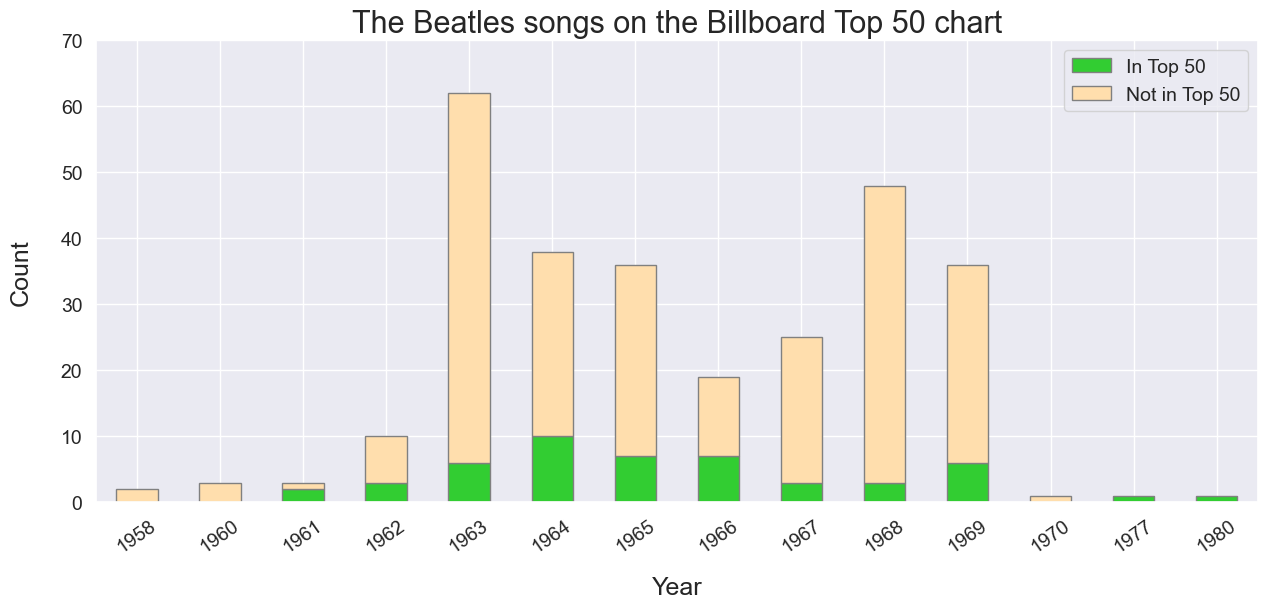

In [38]:
sb.set_theme(rc={'figure.figsize': (15, 8)})
# Create the plot
ax = df.plot(kind='bar', figsize=(15, 7), rot=35, ylim=(0, 70),
             color={'In Top 50': 'limegreen', 'Not in Top 50': 'navajowhite'}, edgecolor='grey',
             fontsize=14,
             stacked=True)

# Modify font sizes
ax.set_title('The Beatles songs on the Billboard Top 50 chart', fontsize=22)
ax.set_xlabel('Year', fontsize=18, labelpad=15)
ax.set_ylabel('Count', fontsize=18, labelpad=20)
ax.legend(fontsize=14)

plt.subplots_adjust(bottom=0.14, top=0.8)

# Save the plot
plt.savefig('../data/The Beatles Billboard Top 50 songs.png', )

# Display the plot
plt.show()

## How have audio features of The Beatles songs evolved over their career? 

Read the dataset ('../data/The Beatles songs dataset, 285x46, v1 (Top50).csv').

In [39]:
# Get the songs as a pd.DataFrame object from '../data/The Beatles songs dataset, 285x46, v1 (Top50).csv'
songs = pd.read_csv('../data/The Beatles songs dataset, 285x46, v1 (Top50).csv')
display(songs.sample(10))

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,Valence,Danceability,Energy,Loudness,Acousticness,Instrumentalness,Liveness,Speechiness,Album debut,Other releases,Single A side,Single B side,Single certification,Genre,Styles,Themes,Moods,Songwriter(s),Lead vocal(s),Cover,Covered by,Chart position UK (Wikipedia),Chart position US (Wikipedia),Highest position (The Guardian),Weeks on chart in UK (The Guardian),Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)",Top50
124,spotify:track:2ylCrFiBu98SC0vFfaCent,I'm Only Sleeping,1966,Revolver,60,182,8,0,103.477,4,0.698,0.494,0.4700,-9.599,0.210000,0.000000,0.2800,0.0301,UK: Revolver US: Yesterday and Today,10.0,NaN,NaN,NaN,"Psychedelic Rock, Psychedelic Folk, Pop/Rock","British Invasion, British Psychedelia, Contemp...","Stay in Bed, Sweet Dreams",Dreamy Freewheeling Spacey Trippy Whimsical Et...,Lennon,Lennon,NaN,7.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,48,-1,No
177,spotify:track:5YrqrCg9WqPyhvIGlpaOst,Nothin' Shakin' (But the Leaves on the Trees),1963,Live at the BBC,27,180,9,1,117.032,4,0.979,0.761,0.6140,-11.970,0.520000,0.000000,0.1790,0.0374,Live at the BBC,NaN,NaN,NaN,NaN,Pop/Rock,"British Invasion, Merseybeat, Contemporary Pop...","Day Driving, Hanging Out, Summer",Bright Energetic Rousing Detached Freewheeling...,Fontaine,Harrison,Y,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
184,spotify:track:4phXWLTSlC1BEogSWhJMDD,Only a Northern Song,1967,Yellow Submarine,43,207,9,1,209.242,4,0.801,0.175,0.7310,-8.341,0.000341,0.000751,0.0846,0.0705,Yellow Submarine,9.0,NaN,NaN,NaN,"Psychedelic Rock, Pop/Rock","British Psychedelia, Contemporary Pop/Rock, Ea...",NaN,Druggy Eerie Enigmatic Freewheeling Hypnotic I...,Harrison,Harrison,NaN,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
139,spotify:track:5FnpXVgDOk2sLT58qM22Of,Julia,1968,The Beatles,57,174,2,1,134.706,4,0.193,0.512,0.0953,-16.082,0.828000,0.000268,0.1170,0.0304,The Beatles,10.0,"Ob-La-Di, Ob-La-Da",Julia,NaN,"Folk, Pop/Rock","Contemporary Pop/Rock, Early Pop/Rock, Singer/...","Heartache, Introspection, Reflection, Reminiscing",Calm/Peaceful Dreamy Gentle Intimate Light Poi...,Lennon,Lennon,NaN,5.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,48,-1,43,50,No
174,spotify:track:1H7gMYGykdtwZOV6s1N0by,Norwegian Wood (This Bird Has Flown),1965,Rubber Soul,75,125,4,1,176.625,3,0.650,0.425,0.3690,-11.876,0.183000,0.001260,0.1120,0.0379,Rubber Soul,18.0,NaN,NaN,NaN,"Folk Rock, Raga Rock, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...","Feeling Blue, Introspection, Reflection, Regre...",Autumnal Bittersweet Melancholy Poignant Refle...,"Lennon, with McCartney",Lennon,NaN,30.0,-1,-1,-1,-1,-1,-1,-1,-1,15,12,26,37,11,8,No
47,spotify:track:3L3fx4XnKCnZCaU3zQxBC1,"Crying, Waiting, Hoping",1963,Live at the BBC,30,131,9,1,133.613,4,0.895,0.647,0.3120,-14.550,0.689000,0.000000,0.1000,0.0358,Live at the BBC,NaN,NaN,NaN,NaN,"Rock and Roll, Pop/Rock","British Invasion, Merseybeat, Contemporary Pop...","Affection/Fondness, Feeling Blue, Reflection",Dramatic Innocent Passionate Reflective Romant...,Buddy Holly,Harrison,Y,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
229,spotify:track:3k6zSunlStXxWF0s1063lk,Thank You Girl,1963,Past Masters (Vols. 1 & 2 / Remastered),41,121,2,1,137.717,4,0.972,0.553,0.7100,-10.492,0.449000,0.000001,0.0989,0.0314,UK: Rarities US: The Beatles Second Album,21.0,From Me to You; Do You Want to Know a Secret?,Thank You Girl; Thank You Girl,NaN,"Merseybeat, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...",In Love,Bright Cheerful Effervescent Fun Earnest Happy...,Lennon and McCartney,Lennon and McCartney,NaN,1.0,-1,35,-1,-1,-1,35,-1,46,-1,-1,-1,-1,-1,-1,Yes
104,spotify:track:0MbM0vhV3WHEaIBzFezBbJ,I Got to Find My Baby,1963,Live at the BBC,24,118,7,1,66.045,4,0.876,0.413,0.5770,

### Valence

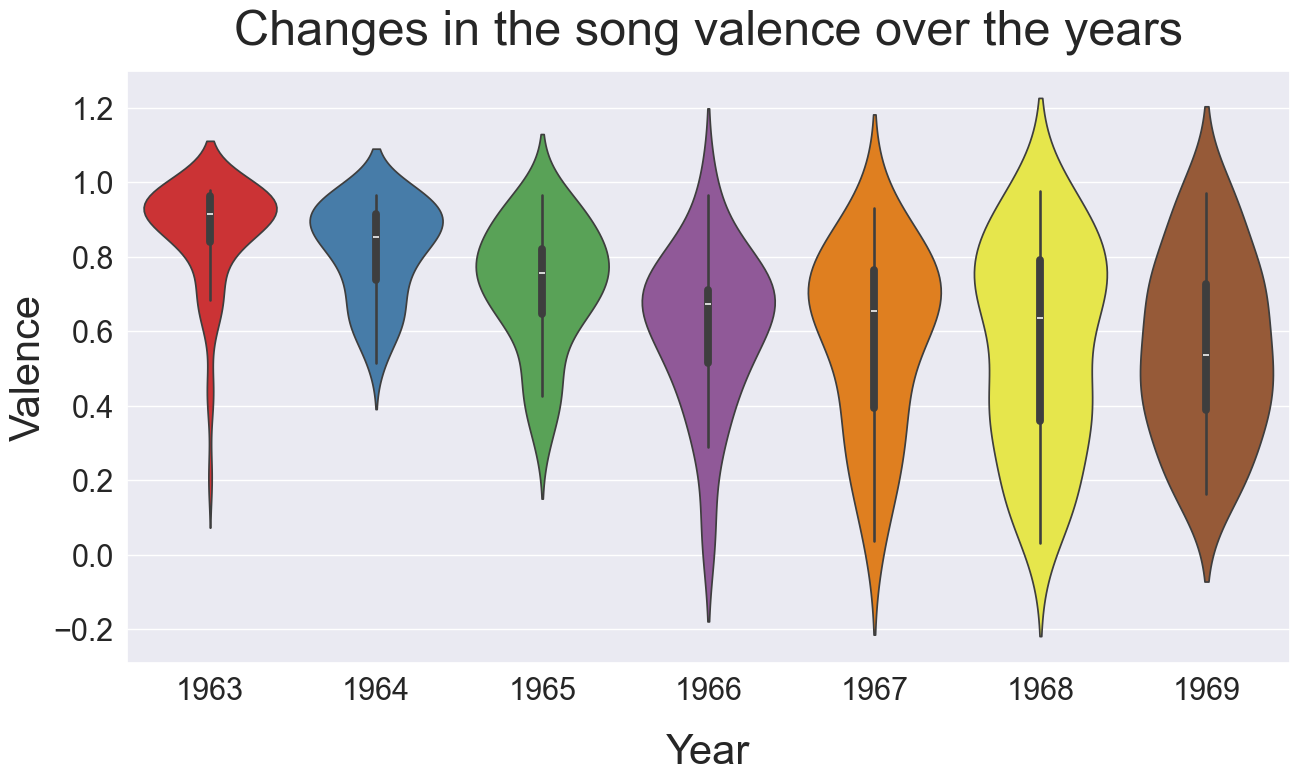

In [121]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Valence', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song valence over the years',fontsize=35, y=1.03)
v.set_xlabel('Year',fontsize=30, labelpad=20)
v.set_ylabel('Valence',fontsize=30)
v.tick_params(labelsize=22)
# v.legend(bbox_to_anchor=(0.3, 0.4), fontsize='xx-large')
v.get_legend().set_visible(False)                              # hide legend, as it unnecessarily clutters the plot

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs valence.png', bbox_inches='tight')

plt.show()

### Energy

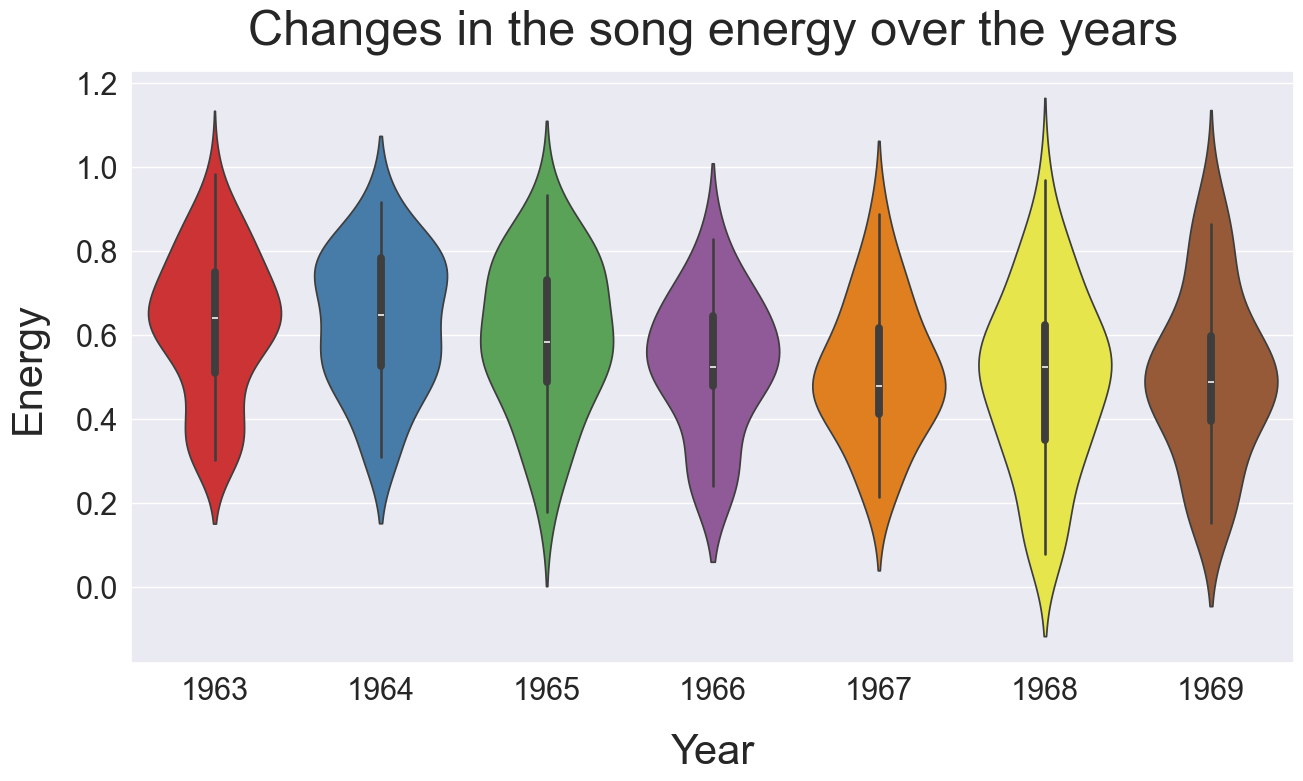

In [122]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Energy', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song energy over the years',fontsize=35, y=1.03)
v.set_xlabel('Year',fontsize=30, labelpad=20)
v.set_ylabel('Energy',fontsize=30, labelpad=20)
v.tick_params(labelsize=22)
# v.legend(bbox_to_anchor=(0.0875, 0.375), fontsize='large')
v.get_legend().set_visible(False)                              # hide legend, as it unnecessarily clutters the plot

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs energy.png', bbox_inches='tight')

plt.show()

### Danceability

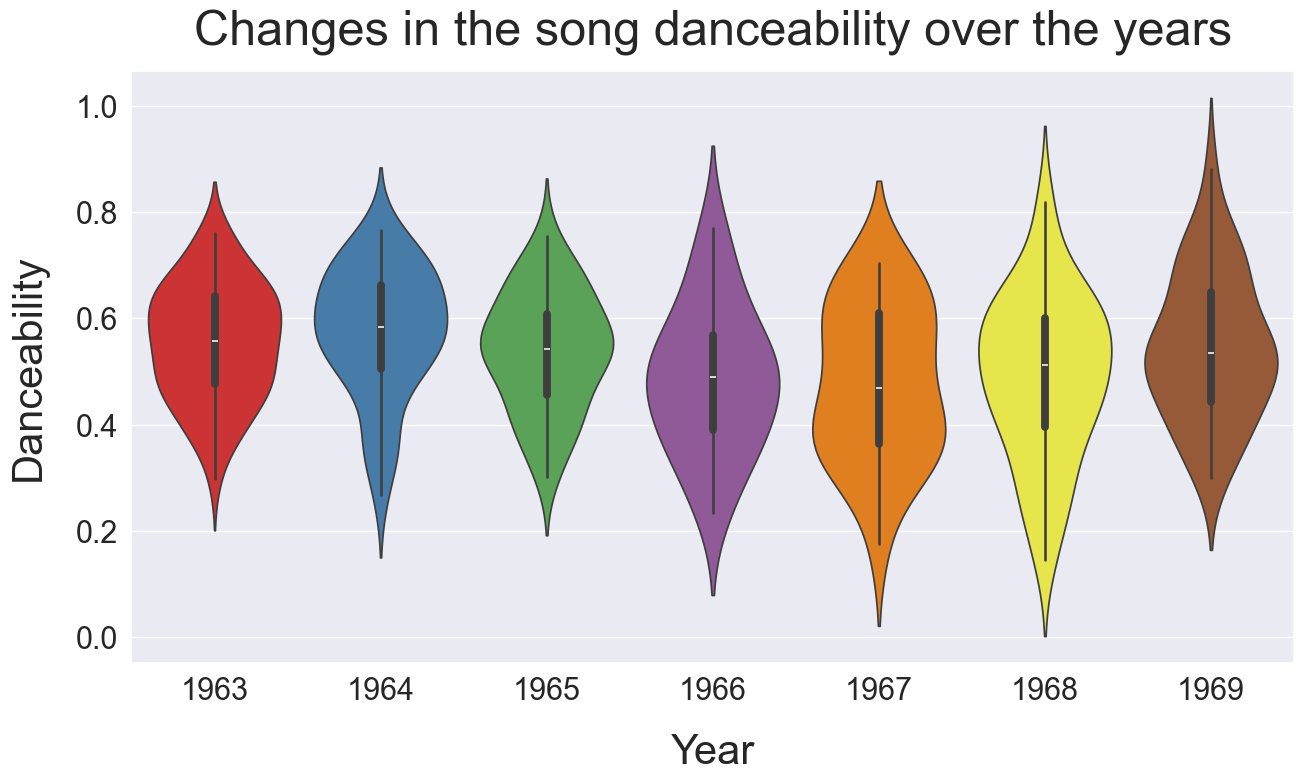

In [123]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Danceability', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song danceability over the years',fontsize=35, y=1.03)
v.set_xlabel('Year',fontsize=30, labelpad=20)
v.set_ylabel('Danceability',fontsize=30, labelpad=20)
v.tick_params(labelsize=22)
# v.legend(bbox_to_anchor=(0.2, 0.375), fontsize='large')
v.get_legend().set_visible(False)                              # hide legend, as it unnecessarily clutters the plot

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs danceability.png', bbox_inches='tight')

plt.show()

### Speechiness

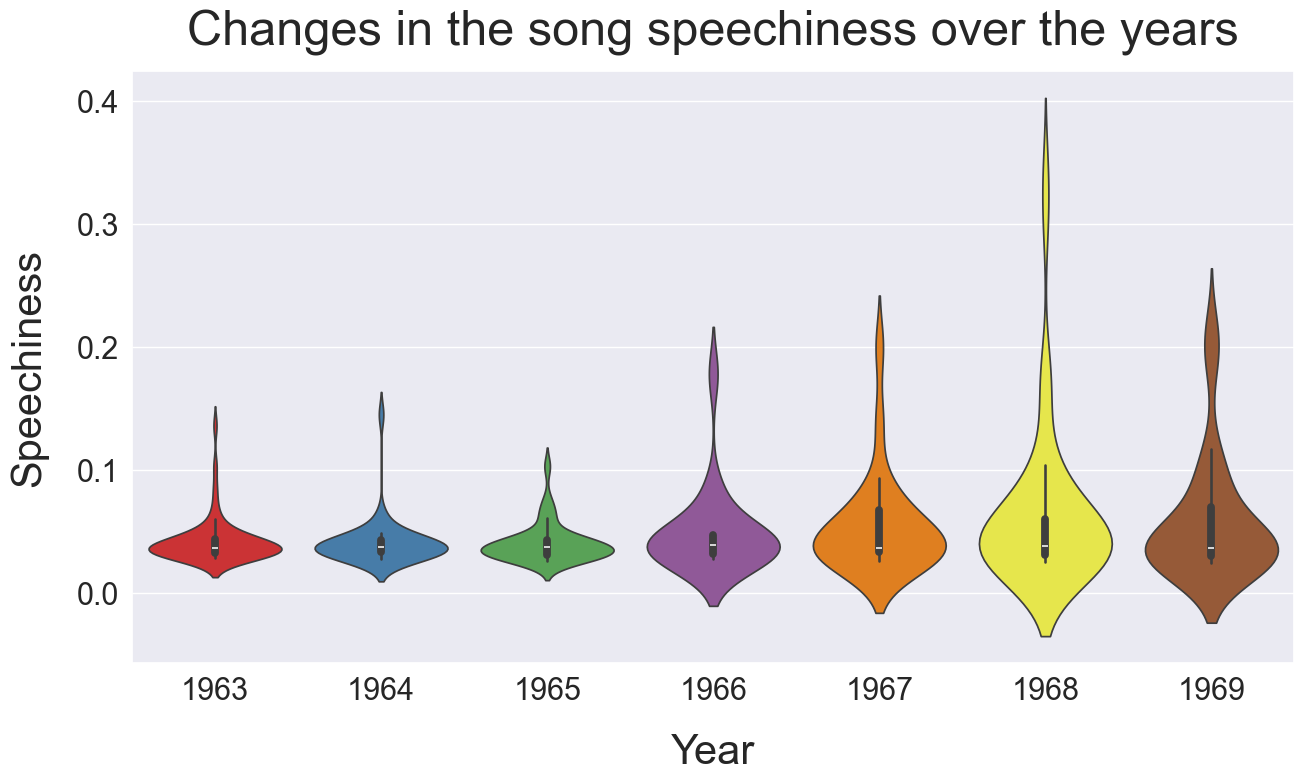

In [124]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Speechiness', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song speechiness over the years',fontsize=35, y=1.03)
v.set_xlabel('Year',fontsize=30, labelpad=20)
v.set_ylabel('Speechiness',fontsize=30, labelpad=20)
v.tick_params(labelsize=22)
# v.legend(bbox_to_anchor=(0.125, 1), fontsize='large')
v.get_legend().set_visible(False)                              # hide legend, as it unnecessarily clutters the plot

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs speechiness.png', bbox_inches='tight')

plt.show()

### Instrumentalness

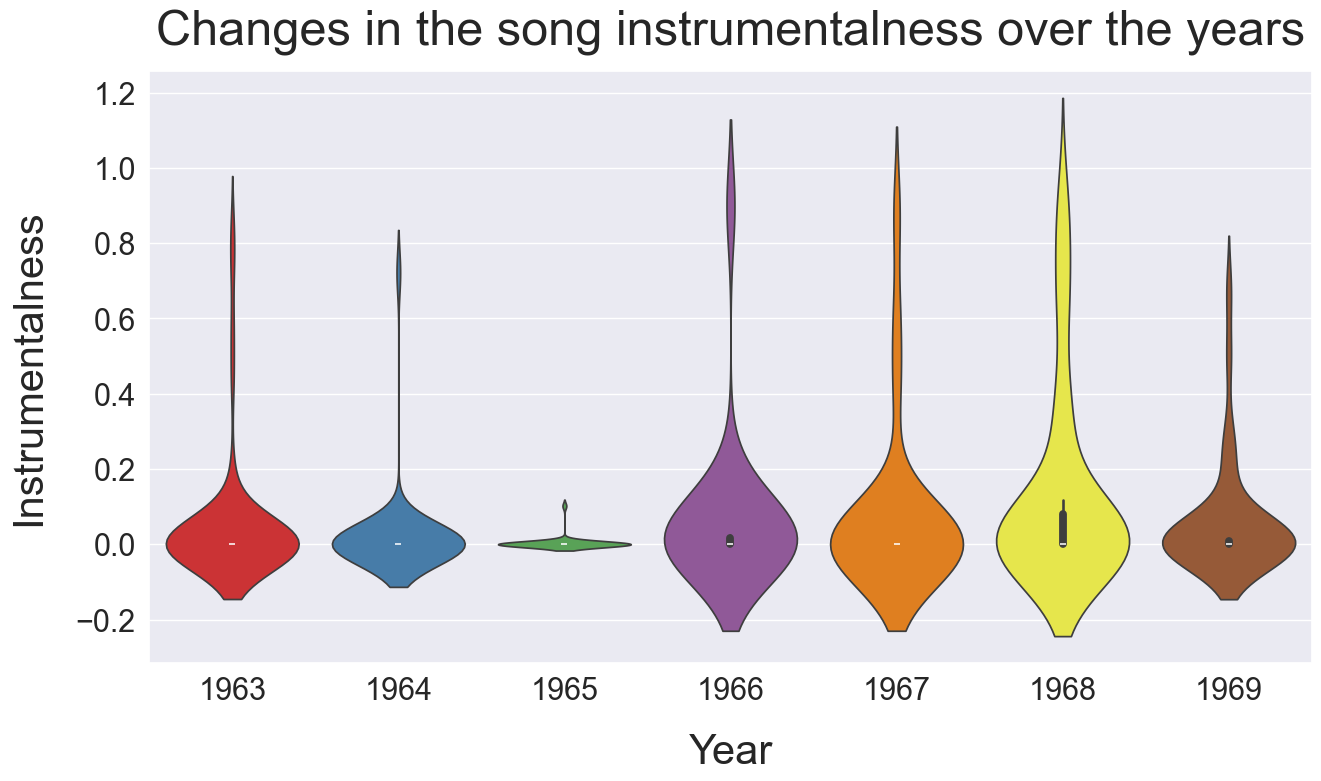

In [125]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Instrumentalness', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song instrumentalness over the years',fontsize=35, y=1.03)
v.set_xlabel('Year',fontsize=30, labelpad=20)
v.set_ylabel('Instrumentalness',fontsize=30, labelpad=20)
v.tick_params(labelsize=22)
# v.legend(bbox_to_anchor=(0.4, 1), fontsize='large')
v.get_legend().set_visible(False)                              # hide legend, as it unnecessarily clutters the plot

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs instrumentalness.png', bbox_inches='tight')

plt.show()

### Acousticness

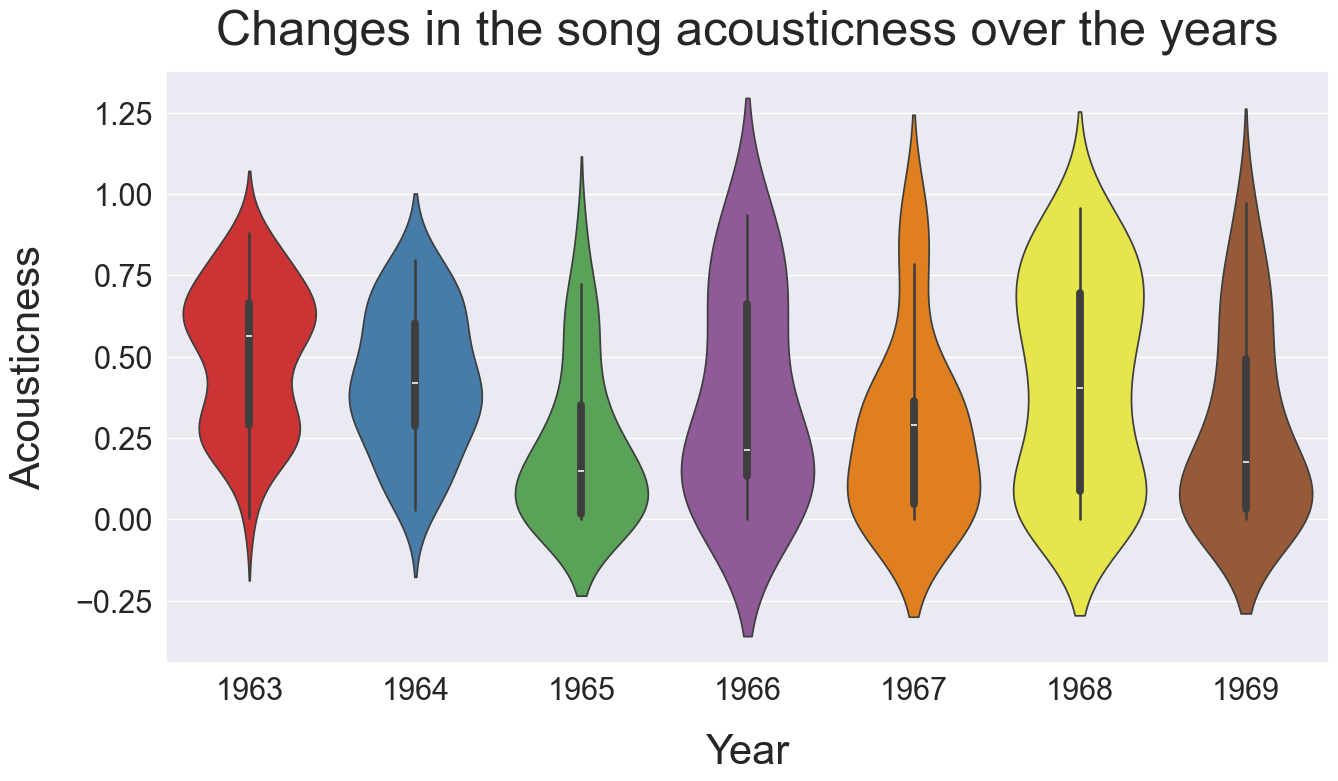

In [126]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Acousticness', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song acousticness over the years',fontsize=35, y=1.03)
v.set_xlabel('Year',fontsize=30, labelpad=20)
v.set_ylabel('Acousticness',fontsize=30, labelpad=20)
v.tick_params(labelsize=22)
# v.legend(bbox_to_anchor=(0.2, 0.38), fontsize='large')
v.get_legend().set_visible(False)                              # hide legend, as it unnecessarily clutters the plot

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs acousticness.png', bbox_inches='tight')

plt.show()

### Loudness

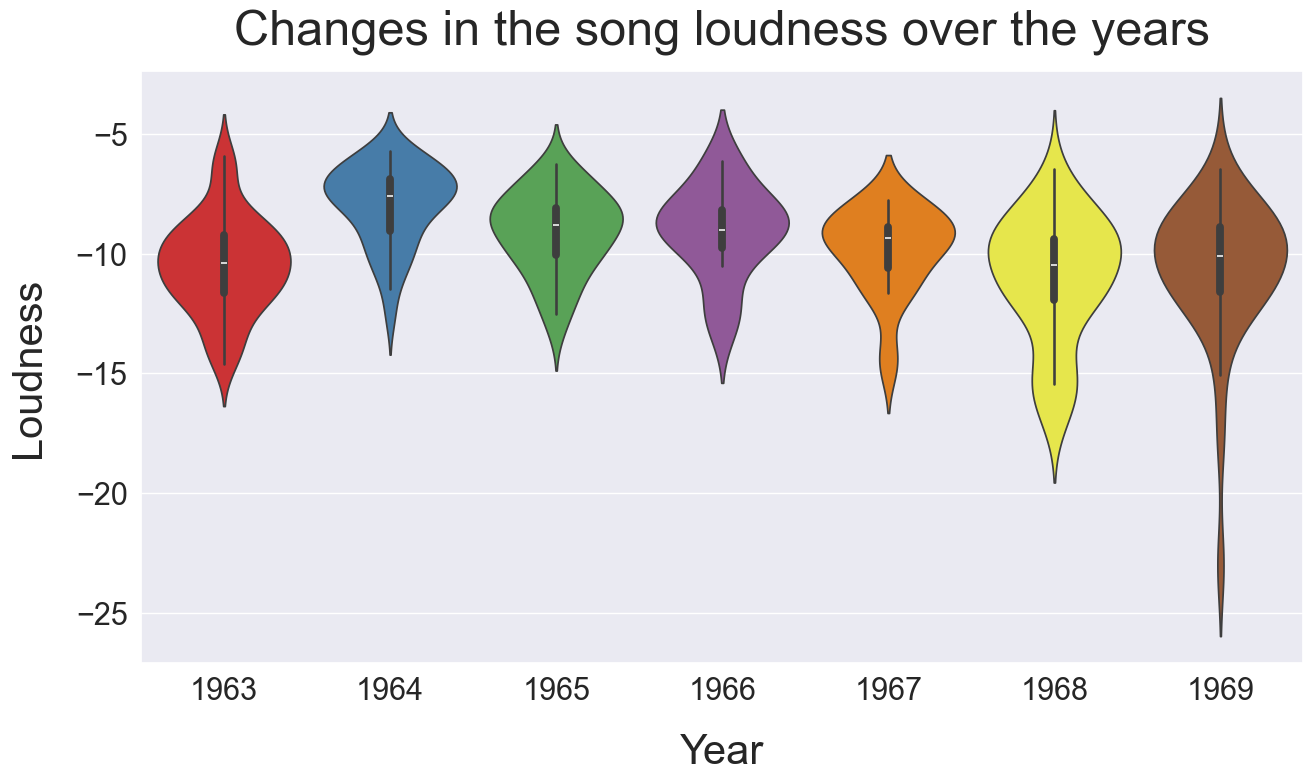

In [127]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Loudness', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song loudness over the years',fontsize=35, y=1.03)
v.set_xlabel('Year',fontsize=30, labelpad=20)
v.set_ylabel('Loudness',fontsize=30, labelpad=20)
v.tick_params(labelsize=22)
# v.legend(bbox_to_anchor=(0.2, 0.39), fontsize='large')
v.get_legend().set_visible(False)                              # hide legend, as it unnecessarily clutters the plot

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs loudness.png', bbox_inches='tight')

plt.show()

### Tempo

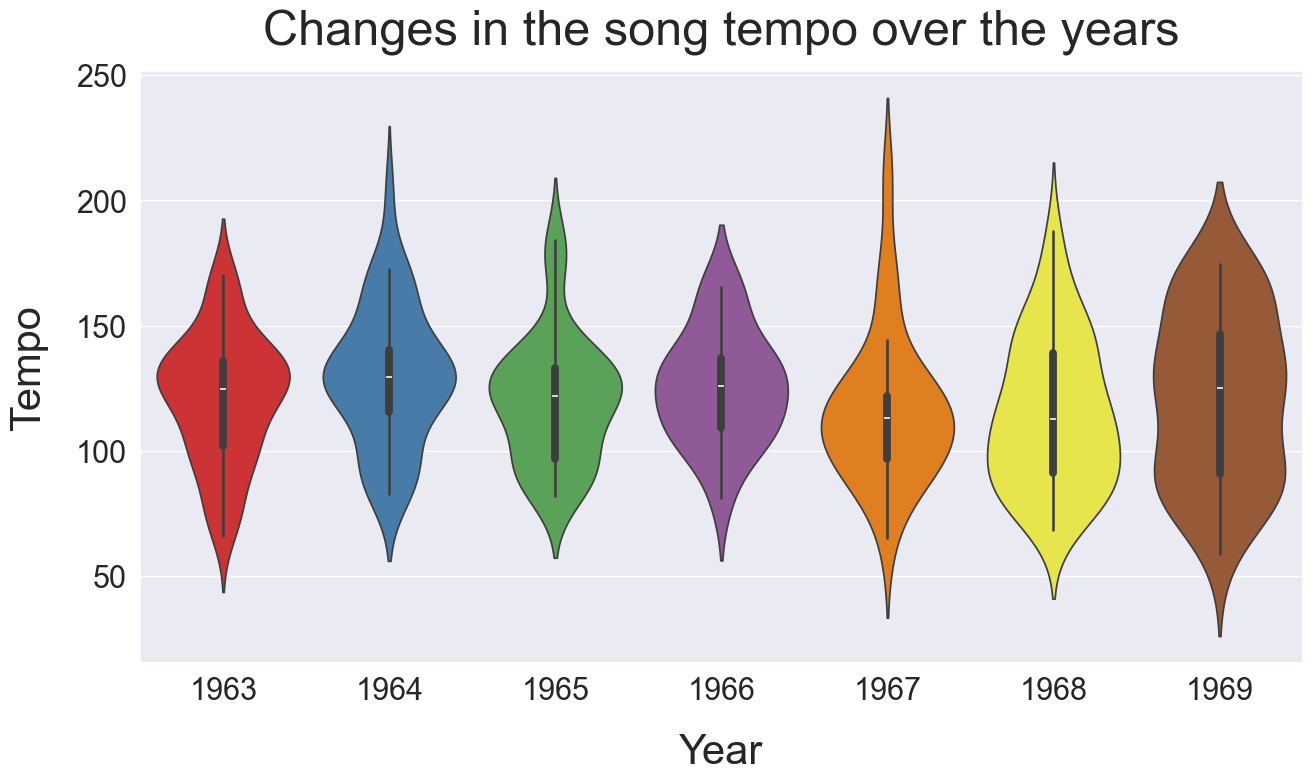

In [128]:
# Years to show the violin plots for
years = (songs.Year >= 1963) & (songs.Year <= 1969)

# Filter data by years and ensure Year is a categorical variable
filtered_data = songs.loc[years, :]
filtered_data.loc[:, 'Year'] = filtered_data['Year'].astype('category')

# Create the violin plot with categorical Year
v = sb.violinplot(x='Year', hue='Year', y='Tempo', data=filtered_data, palette='Set1')

# Set plot parameters
v.axes.set_title('Changes in the song tempo over the years',fontsize=35, y=1.03)
v.set_xlabel('Year',fontsize=30, labelpad=20)
v.set_ylabel('Tempo',fontsize=30, labelpad=20)
v.tick_params(labelsize=22)
# v.legend(bbox_to_anchor=(0.197, 1.005), fontsize='large')
v.get_legend().set_visible(False)                              # hide legend, as it unnecessarily clutters the plot

# Adjust spacing between title and plot
plt.subplots_adjust(top=0.85)  # Adjust the top margin

# Save the plot
plt.savefig('../data/The Beatles songs tempo.png', bbox_inches='tight')

plt.show()

In [135]:
# What are the songs with low loudness from 1969?
songs.loc[(songs.Year == 1969) & (songs.Loudness <= -12), ]['Title']
# What is the instrumentalness of the songs from 1965?
songs.loc[songs.Year == 1965, ['Title', 'Instrumentalness']]

,Title,Instrumentalness
1,12-bar Original,0.102000
9,Act Naturally,0.000000
19,Another Girl,0.000000
26,Bad Boy,0.000000
48,Day Tripper,0.000001
53,Dizzy Miss Lizzy,0.004450
60,Drive My Car,0.000000
74,Girl,0.000000
87,Help!,0.000000
107,I Need You,0.000000


## Popularity of The Beatles songs today (heatmap)

Read the dataset ('../data/The Beatles songs dataset, 285x46, v1 (Top50).csv').

In [137]:
# Get the songs as a pd.DataFrame object from '../data/The Beatles songs dataset, 285x46, v1 (Top50).csv'
songs = pd.read_csv('../data/The Beatles songs dataset, 285x46, v1 (Top50).csv')
display(songs.sample(10))

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,Valence,Danceability,Energy,Loudness,Acousticness,Instrumentalness,Liveness,Speechiness,Album debut,Other releases,Single A side,Single B side,Single certification,Genre,Styles,Themes,Moods,Songwriter(s),Lead vocal(s),Cover,Covered by,Chart position UK (Wikipedia),Chart position US (Wikipedia),Highest position (The Guardian),Weeks on chart in UK (The Guardian),Weeks at No1 in UK (The Guardian),Highest position (Billboard),Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)",Top50
48,spotify:track:7qbRP2jO0Sq3kTYdEW1v00,Day Tripper,1965,Past Masters (Vols. 1 & 2 / Remastered),44,170,6,0,137.698,4,0.729,0.643,0.723,-10.628,0.10400,0.000001,0.2740,0.0299,UK: A Collection of Beatles Oldies US: Yesterd...,20.0,We Can Work It Out,Day Tripper,RIAA Gold,"Rock, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...",Breakup,Energetic Exciting Rousing Freewheeling Lively...,"Lennon, with McCartney",Lennon and McCartney,NaN,33.0,1,5,1,12,5,5,-1,29,30,39,-1,40,34,30,Yes
200,spotify:track:1ITQbrueGLl581a25XXm9c,Rocky Raccoon,1968,The Beatles,61,213,7,1,79.456,4,0.648,0.599,0.363,-11.728,0.33300,0.000000,0.2430,0.0315,The Beatles,9.0,NaN,NaN,NaN,"Country, Folk Rock, Pop/Rock","Contemporary Pop/Rock, Early Pop/Rock, Rock & ...",NaN,Amiable/Good-Natured Freewheeling Fun Humorous...,"McCartney, with Lennon",McCartney,NaN,7.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
87,spotify:track:7DD7eSuYSC5xk2ArU62esN,Help!,1965,Help!,74,138,6,0,95.003,4,0.763,0.534,0.725,-7.576,0.18800,0.000000,0.0994,0.0332,Help!,34.0,Help!,I'm Down,RIAA Gold,"Folk Rock, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...","Feeling Blue, Heartache, Introspection",Angst-Ridden Exciting Intense Passionate Plain...,"Lennon, with McCartney",Lennon,NaN,43.0,1,1,1,14,3,1,3,14,13,15,41,4,8,36,Yes
196,spotify:track:1aOzDhi5a1RWWRy5dmYA8I,Revolution 1,1968,The Beatles,52,201,9,1,98.425,4,0.695,0.386,0.626,-9.451,0.07850,0.001640,0.6210,0.0377,The Beatles,7.0,NaN,NaN,NaN,"Hard rock, Pop/Rock","Contemporary Pop/Rock, Early Pop/Rock, Rock & ...","Revolutionary, Lifecycle, Politics/Society, Pr...",Acerbic Energetic Exciting Fiery Passionate Ro...,Lennon,Lennon,NaN,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,35,-1,No
148,spotify:track:0KogQrSowDnZoU8GSpaxkj,Little Child,1963,With the Beatles,46,108,9,1,75.596,4,0.886,0.526,0.858,-8.533,0.29200,0.001000,0.3530,0.0476,UK: With the Beatles US: Meet The Beatles!,10.0,NaN,NaN,NaN,"Rock and Roll, Pop/Rock","British Invasion, Contemporary Pop/Rock, Early...",NaN,Bright Energetic Exciting Exuberant Fun Lively...,Lennon and McCartney,Lennon and McCartney,NaN,2.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
157,spotify:track:25yQPHgC35WNnnOUqFhgVR,Lucy in the Sky with Diamonds,1967,Sgt. Pepper's Lonely Hearts Club Band,70,208,2,1,65.090,1,0.668,0.311,0.325,-9.042,0.04690,0.000000,0.1390,0.0283,Sgt. Pepper's Lonely Hearts Club Band,5.0,NaN,NaN,NaN,"Psychedelic Rock, Pop/Rock","British Psychedelia, Contemporary Pop/Rock, Ea...",The Creative Side,Ambitious Bright Druggy Elaborate Playful Thea...,Lennon with McCartney,Lennon,NaN,17.0,-1,-1,-1,-1,-1,-1,-1,-1,39,19,39,11,21,-1,No
128,spotify:track:3gwRWIbr5ycEVLIAXrWaw7,I've Got a Feeling,1969,Let It Be,59,217,2,1,165.156,4,0.364,0.440,0.609,-8.824,0.07150,0.000000,0.5820,0.0358,Let It Be,12.0,NaN,NaN,NaN,"Blues Rock, Pop/Rock","Album Rock, Contemporary Pop/Rock, Early Pop/R...","New Love, Biographical, Dreaming, In Love, Nat...",Freewheeling Passionate Ramshackle Rousing Sea...,"McCartney, with Lennon","McCartney, with Lennon",NaN,6.0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,No
233,spotify:track:6r7JAngkBzKGDKRUzLgY2U,The Ballad of John and Yoko,1969,Past Masters (Vols. 1 & 2 / Remastered),40,179,4,1,135.183,4,0.938,0.656,0.865,-8.241,0.00561,0.000104,0.0853,0.0311,UK: 1967

### Valence

Create a new column in the dataframe, e.g. `Valence_category`, using `pd.qcut()` function to split the entire range of `songs.Valence` values into five equally sized subranges, `Very Low` to `Very High` (with ~equal number of elements in each subrange): `songs['Valence_category'] = pd.qcut(songs.Valence, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])`.

In [138]:
# Create the new column
songs['Valence_category'] = pd.qcut(songs.Valence, q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
songs.Valence_category.sample(10)

214         High
34          High
56     Very High
51           Low
79     Very High
48        Medium
77      Very Low
280         High
164    Very High
187       Medium
Name: Valence_category, dtype: category
Categories (5, object): ['Very Low' < 'Low' < 'Medium' < 'High' < 'Very High']

In [139]:
# Check that the type of its values is Categorical, using type(<pd.df>.<new column>.values)
type(songs.Valence_category.values)
# Display the categories in the new column using <pd.df>.<new column>.cat.categories
songs.Valence_category.cat.categories

Index(['Very Low', 'Low', 'Medium', 'High', 'Very High'], dtype='object')

In [283]:
# Check value_counts() for 'valence_category' (the counts should be more or less equal)
songs.Valence_category.value_counts()

Valence_category
Low          58
Very Low     57
Medium       57
High         57
Very High    56
Name: count, dtype: int64

Rearrange the categories of `valence_category` to make the output natural.
Use `<pd.df>['<column>'] = pd.Categorical(<pd.df>[<column>], categories=['<cat1>, <cat2>, ...'], ordered=True)`. In this example, order categories from `Very High` to `Very Low`.

In [140]:
songs.Valence_category = pd.Categorical(songs.Valence_category, 
                                        categories=['Very High', 'High', 'Medium', 'Low', 'Very Low'], 
                                        ordered=True)

Create a suitable pivot table. Use `<pivot table> = <pd.df>.pivot_table(values='<column with values to show on the heatmap>', index='<categorical index>', columns='<column>')`
- `values` (to be shown in the cells): `Popularity`
- `index` (to be shown on y-axis): `Valence_category`
- `columns` (to be shown on x-axis): `Year`

In [142]:
pivot_table = songs.pivot_table(values='Popularity', index='Valence_category', columns='Year')

Plot the corresponding heatmap. Based on [this](https://pythonbasics.org/seaborn-heatmap/), [this](https://seaborn.pydata.org/generated/seaborn.heatmap.html), and [this](https://stackoverflow.com/a/29648332/1899061).

It is often a good idea to change the default figure size first, using `sb.set_theme(rc={'figure.figsize': (<x_size>, <y_size>)})`, to avoid cluttering on the heatmap (alternatively, use something like `plt.figure(layout='constrained', facecolor='navajowhite', figsize=(5, 3.5))`). Here `rc` stands for 'run command' - essentially, configurations which will execute when running the code. Experiment with `(<x_size>, <y_size>)`. The values that have worked well in this example: (15.7, 5.27).

Then use `sb.heatmap(data=<pivot table>, annot=True, fmt='<format string>', cmap='<color map>');`
- `data=<pivot table>`: the pivot table created in the previous step
- `annot=True`: annotate heatmap cells with values
- `fmt='<format_string>'`: for example, use `'.0f'` to show int values in annotations, not scientific notation (`'g'` for using mixed int and float annotations)
- `cmap='<color map>'`: color map (see [this](https://10xsoft.org/courses/data-analysis/mastering-data-visualization-with-python/section-4-data-visualization-using-seaborn/colour-palettes-seaborn/)); a good one is `viridis`

To set the title for the heatmap, or to change the axes labels, use (<b>AFTER</b> the call to `sb.heatmap()`!) something like:

`plt.title('<title>', loc='left', color='<color>', alpha=0.4, size=14)`<br>
`plt.xlabel('<xlabel>', size=<font size>, color='<color>')`<br>
`plt.ylabel('<ylabel>', size=<font size>, color='<color>')`<br>
`plt.show()`    # it's a must

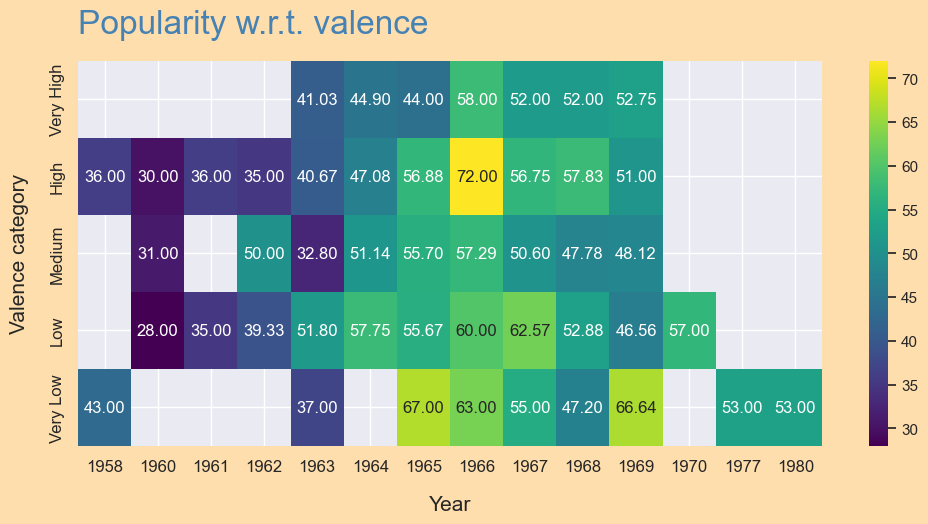

In [143]:
# sb.set_theme(rc={'figure.figsize': (15.7, 5.27)})
plt.figure(facecolor='navajowhite', figsize=(12, 5))
h = sb.heatmap(data=pivot_table, annot=True, fmt='.2f', cmap='viridis')
plt.title('Popularity w.r.t. valence', loc='left', color='steelblue', size=24, y=1.05)

# Set plot parameters
h.set_xlabel('Year',fontsize=15, labelpad=15)
h.set_ylabel('Valence category',fontsize=15, labelpad=15)
h.tick_params(labelsize=12)

# Save the plot
plt.savefig('../data/The Beatles songs popularity w.r.t. valence (heatmap).png', bbox_inches='tight')

plt.show()

In [149]:
# What are the 1965 songs with High valence?
songs.loc[(songs.Valence_category == 'High') & (songs.Year == 1965), 'Title']
songs.loc[(songs.Popularity >= 68) & (songs.Year == 1966), 'Title']

62                  Eleanor Rigby
91     Here, There and Everywhere
221     Strawberry Fields Forever
262           When I'm Sixty Four
Name: Title, dtype: object

<u>Save this version as a new *.csv* file, e.g. `../data/The Beatles songs dataset, 285x47, v0 (categories).csv`, for possible use in other examples.</u> (`<pd.df>.to_csv('<path>')`)

In [301]:
songs.to_csv('../data/The Beatles songs dataset, 285x47, v0 (categories).csv', index=False)

### Average instrumentalness
Average instrumentalness of songs over the years, represented as circles with sizes proportional to the numbers of songs.

In [302]:
songs = pd.read_csv('../data/The Beatles songs dataset, 285x47, v0 (categories).csv')
songs.sample(10)

,URI,Title,Year,Album,Popularity,Duration,Key,Mode,Tempo,Time_signature,...,Weeks at No1 (Billboard),Top 50 (Billboard),Top 50 (Ultimate classic rock),Top 50 (Rolling Stone),Top 50 (NME),Top 50 (Top50songs.org),"Top 50 (USA today, 2017)","Top 50 (Vulture, by Bill Wyman)",Top50,Valence_category
163,spotify:track:2S8xyNRJX1XQdo3qnTuovI,Maxwell's Silver Hammer,1969,Abbey Road,61,207,2,1,131.120,4,...,-1,-1,-1,-1,-1,42,-1,-1,No,Medium
271,spotify:track:2rQvZscmpb6a7ejDiKprcL,Yes It Is,1965,Past Masters (Vols. 1 & 2 / Remastered),46,161,4,1,132.571,4,...,-1,-1,-1,-1,-1,-1,-1,-1,No,Very Low
197,spotify:track:5dZ8PeKKZJLIQAWNTdp8WX,Revolution 9,1968,The Beatles,47,502,2,0,91.158,4,...,-1,-1,-1,-1,-1,-1,-1,-1,No,Very Low
17,spotify:track:4KRgqwb4kvBuTz1utbYxfb,And Your Bird Can Sing,1966,Revolver,58,121,4,1,132.590,4,...,-1,-1,-1,-1,30,-1,-1,33,No,Very High
222,spotify:track:4nwKdZID1ht0lDBJ5h2p87,Sun King,1969,Abbey Road,59,146,2,1,74.994,4,...,-1,-1,-1,-1,-1,-1,-1,-1,No,Very Low
6,spotify:track:7fh53ta3vAOGJMQ4i5tCHe,A Taste of Honey,1963,Please Please Me,51,163,1,0,101.408,3,...,-1,-1,-1,-1,-1,-1,-1,-1,No,Very Low
191,spotify:track:6EHuOufBeL6vk3TvVJB5qo,Please Please Me,1962,Please Please Me,61,120,4,1,139.388,4,...,-1,18,19,20,-1,-1,28,5,Yes,Medium
186,spotify:track:7Msq9qojB7yORuJvz49iUy,P.S. I Love You,1962,Please Please Me,54,126,2,1,134.435,4,...,-1,34,-1,-1,-1,-1,-1,-1,Yes,Medium
137,spotify:track:2ue1KRstSKHF8jQkIJZiNC,It's Only Love,1965,Help!,56,115,0,1,113.155,3,...,-1,-1,-1,-1,-1,-1,-1,-1,No,Low
256,spotify:track:0CGbof9amBnsNlRhZ8IY2H,Wait,1965,Rubber Soul,55,136,6,0,127.201,4,...,-1,-1,-1,-1,-1,-1,-1,-1,No,Low


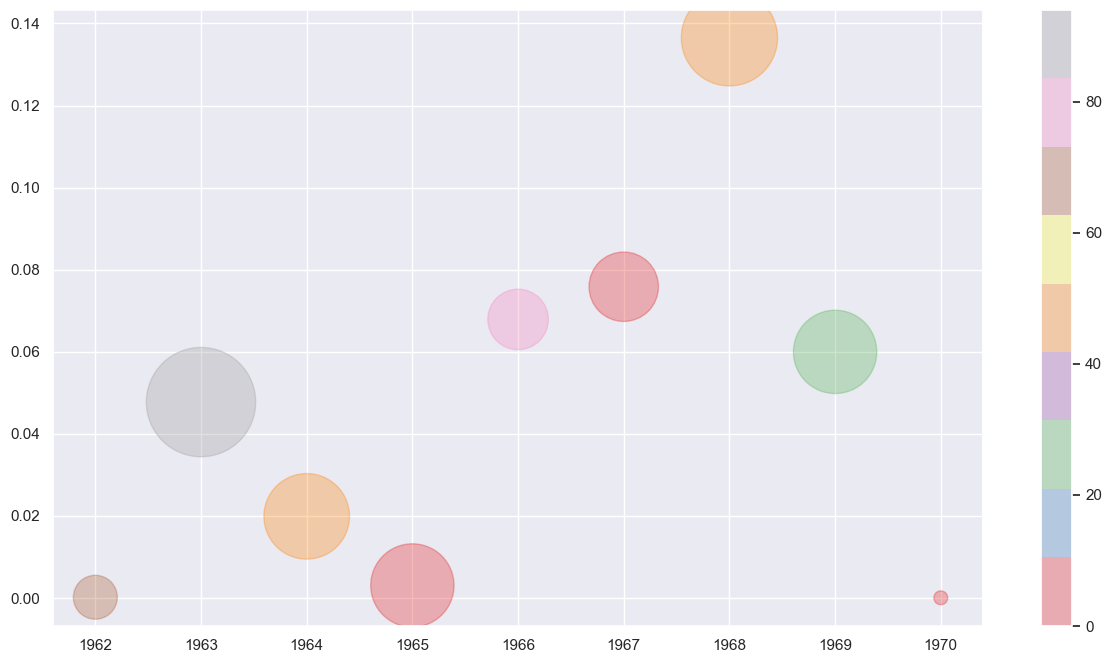

In [303]:
songs_by_year = songs.groupby('Year')
years_1962_1970 = np.array(range(1962, 1971))

avg_instrumentalness = []
for year in years_1962_1970:
    avg_instrumentalness.append(np.mean(songs_by_year.get_group(year)['Instrumentalness']))
avg_instrumentalness = np.array(avg_instrumentalness)

rng = np.random.RandomState(370)

colors = rng.choice(100, size=len(years_1962_1970), replace=False)            # random sample, no duplicates
# display(colors)

sizes = []
for year in years_1962_1970:
    sizes.append(len(songs_by_year.get_group(year)) * 100)                    # sizes proportional to the numbers of songs

plt.scatter(years_1962_1970, avg_instrumentalness,
            c=colors, s=sizes, alpha=0.3,                                     # alpha: the level of transparency
            cmap='Set1')                                                      # cmap: a pre-defined color map

# Save the plot
plt.savefig('../data/The Beatles songs average instrumentalness (scatterplot).png')

plt.colorbar();                                                               # show color scale